# <strong> Import libraries</strong>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# <strong> Read data</strong>

In [30]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195


### &#9889; **Question 7 : Which continent is recording the highest number of infections and deaths as of the latest day? Which country has the highest %?**
There are many steps:
- Get the latest day
- Get the sum of number of cases and deaths for each continent
- Plot the pie chart

### **Step 1: Get the latest day**

In [31]:
last_date = covid_df[covid_df['Date'] == '2023-03-10']
last_date

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195
17,Albania,2023-03-10,334474,17,3598.0,0.0,329206.0,11,1670.0,0,1941032.0,2866374,Europe,9
26,Algeria,2023-03-10,271499,3,6881.0,0.0,182819.0,6,81799.0,0,230861.0,45350148,Africa,167
35,Angola,2023-03-10,105288,0,1933.0,0.0,103342.0,0,13.0,0,1499795.0,35027343,Africa,333
44,Argentina,2023-03-10,10044957,0,130472.0,0.0,9911664.0,0,2821.0,363,35716069.0,46010234,South America,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Venezuela,2023-03-10,552188,20,5854.0,0.0,545948.0,2,386.0,31,3359014.0,29266991,South America,53
1394,Vietnam,2023-03-10,11527026,14,43186.0,0.0,10614815.0,6,869025.0,1,85826548.0,98953541,Asia,9
1403,Yemen,2023-03-10,11945,0,2159.0,0.0,9124.0,0,662.0,23,329592.0,31154867,Asia,"2,608"
1412,Zambia,2023-03-10,343135,0,4057.0,0.0,338854.0,0,224.0,0,3943335.0,19470234,Africa,57


### **Step 2: Get the sum of number of cases and deaths for each continent**

In [32]:
# GET SUM OF CASES FOR EACH CONTINENT
continent_cases = last_date.groupby('Continent').sum().reset_index()
continent_cases = continent_cases.sort_values(by='TotalCases', ascending=False)

### **Step 3: Calculate the percentage of deaths and cases for each continent**

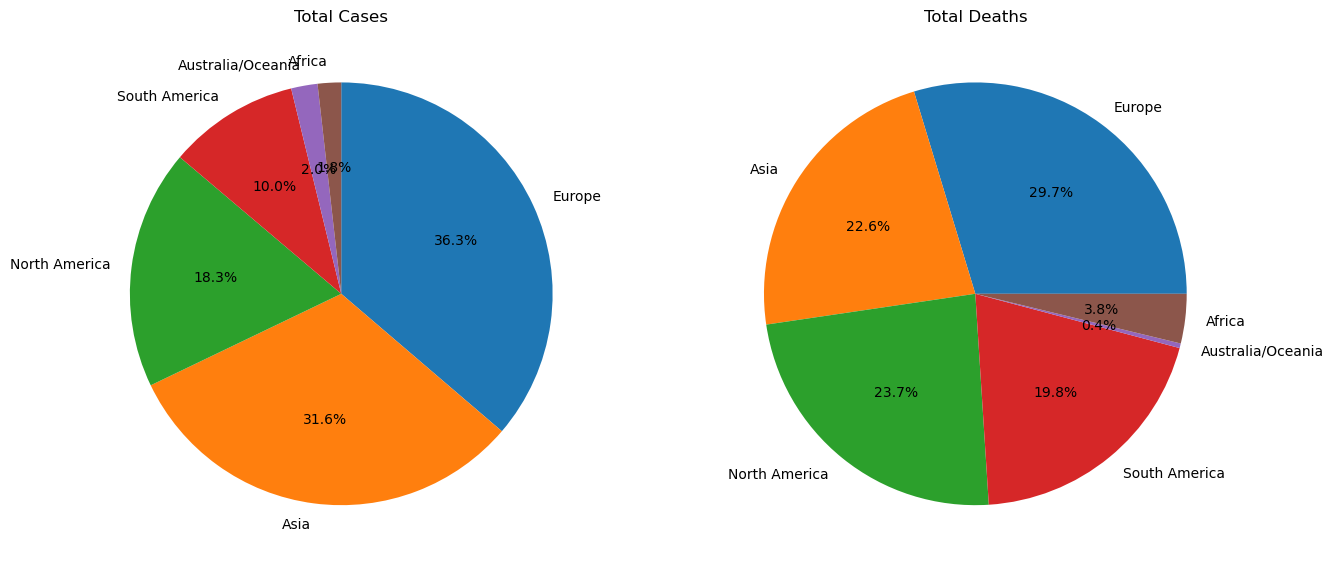

In [33]:
# how to plot 2 pie charts in one figure
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
# explode the first pie chart
# plot the first pie chart
ax[0].pie(continent_cases['TotalCases'], labels=continent_cases['Continent'], autopct='%1.1f%%', counterclock=False, startangle=90)
ax[0].set_title('Total Cases')
# plot the second pie chart
ax[1].pie(continent_cases['TotalDeaths'], labels=continent_cases['Continent'], autopct='%1.1f%%')
ax[1].set_title('Total Deaths')
plt.show()

&#9889; <font color="yellow">**Comment on the results.**</font>
- Total cases and deaths in Europe are the highest with 36.3% and 29.7% respectively.
- Total cases in Asia and Europe are nearly 80% in the world. Those are the most affected so the total deaths in Asia and Europe are also the high. 50% of the world's total deaths are in Asia and Europe.
- Africa has the lowest percentage of cases in the world with only 1.8%.

### **Step 4: Which country has the highest percentage of cases and deaths in Europe and Asia?**

In [48]:
Europe_df = last_date[last_date['Continent'] == 'Europe']
Europe_df
# percentage of cases for each country in Europe
Europe_df.loc[:, 'Percentage_Cases'] = round(Europe_df['TotalCases'] / Europe_df['TotalCases'].sum(), 4) * 100
Europe_df.loc[:, 'Percentage_Deaths'] = round(Europe_df['TotalDeaths'] / Europe_df['TotalDeaths'].sum(), 4) * 100

# top 10 countries with highest cases and deaths in Europe 
top10_cases_Europe = Europe_df.sort_values(by='Percentage_Cases', ascending=False).head(10)
top10_deaths_Europe = Europe_df.sort_values(by='Percentage_Deaths', ascending=False).head(10)

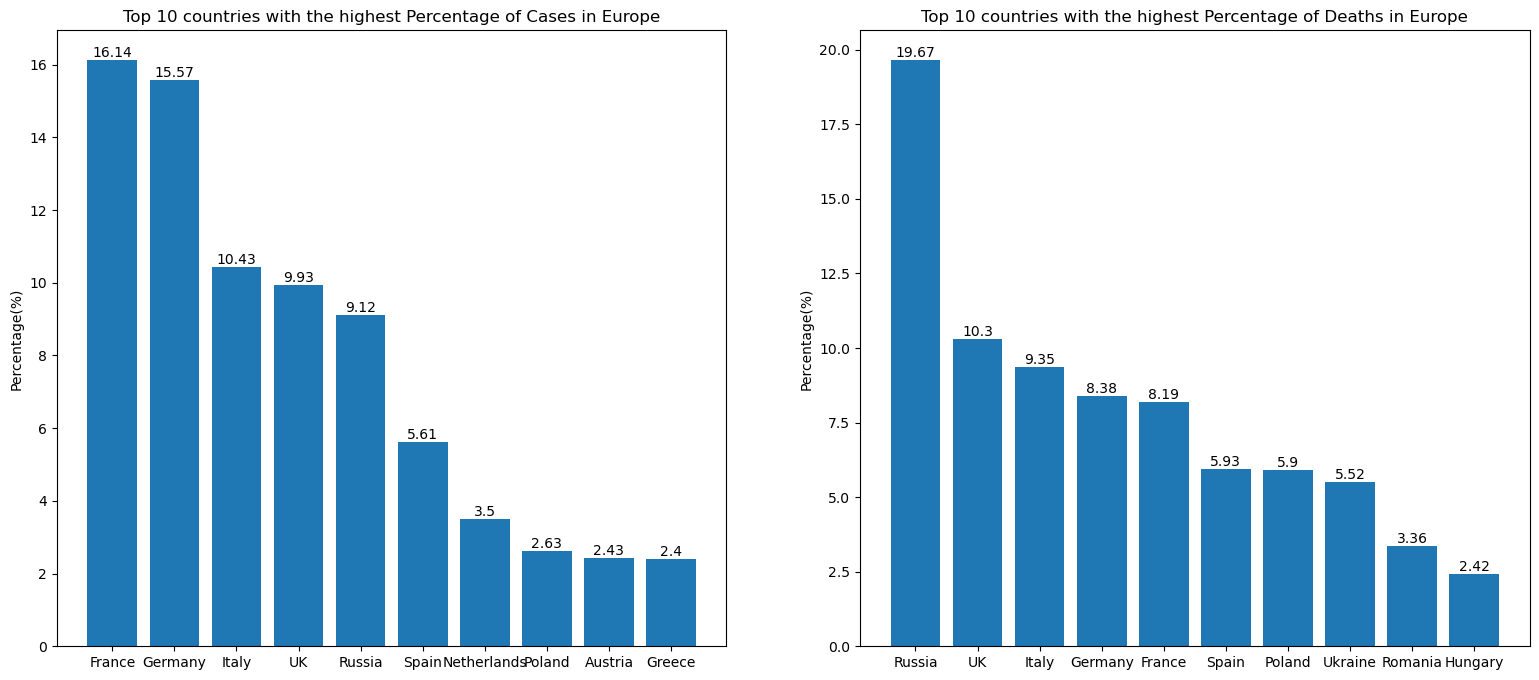

In [49]:
# visualize 2 bar charts in one figure for percentage of cases and percentage of deaths for each country in Europe
fig, ax = plt.subplots(1, 2, figsize=(19, 8))
bars0 = ax[0].bar(top10_cases_Europe['Country'], top10_cases_Europe['Percentage_Cases'])
ax[0].set_title('Top 10 countries with the highest Percentage of Cases in Europe')
ax[0].set_ylabel('Percentage(%)')
ax[0].bar_label(bars0)
bars1 = ax[1].bar(top10_deaths_Europe['Country'], top10_deaths_Europe['Percentage_Deaths'])
ax[1].set_title('Top 10 countries with the highest Percentage of Deaths in Europe')
ax[1].set_ylabel('Percentage(%)')
ax[1].bar_label(bars1)
plt.show()


&#9889; <font color="yellow">**Comment on the results.**</font>
- In Europe, the highest percentage of cases are in French and Germany with 16.4% and 15.57% respectively.
- However, the highest death rate is Russia with 19.67%, twice as high as the second place which is UK with 10.3%.
- That can be explained by the some reasons such as Reporting discrepancies in the way different countries or Testing rates.